In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert1/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert1/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert1/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert1/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [3]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [4]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [5]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [6]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [7]:
df_train=df_train.append(df_valid,ignore_index = True)

In [8]:
len(df_train)

324

In [9]:
df_train

,labels
0,3
1,1
2,0
3,1
4,2
...,...
319,0
320,1
321,1
322,0


In [10]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [11]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.993720,0.000027,0.001884,0.004026,0.000342,9.835380e-01,6.112364e-06,1.645300e-02,1.908918e-06,1.039559e-06
1,0.001105,0.004085,0.002060,0.992589,0.000161,3.075608e-04,1.915805e-04,2.438296e-07,9.994803e-01,2.033594e-05
2,0.001725,0.000207,0.945261,0.002842,0.049965,5.183851e-07,5.305045e-08,9.981736e-01,1.545796e-04,1.671285e-03
3,0.993899,0.000021,0.002025,0.003765,0.000290,9.994332e-01,5.667822e-07,5.290348e-04,7.027840e-09,3.718087e-05
4,0.992846,0.000035,0.001896,0.004860,0.000363,9.398533e-01,9.331000e-06,5.492401e-02,5.198926e-03,1.444565e-05
5,0.000047,0.992106,0.000163,0.002229,0.005456,2.026757e-08,7.626172e-05,1.793936e-09,9.999113e-01,1.235467e-05
6,0.007018,0.000116,0.962817,0.026220,0.003829,3.099375e-04,7.802500e-06,9.986067e-01,3.384839e-05,1.041760e-03
7,0.993658,0.000025,0.001934,0.004079,0.000304,9.851055e-01,1.265950e-07,1.489280e-02,6.261973e-09,1.537791e-06
8,0.994440,0.000031,0.001480,0.003714,0.000336,9.999961e-01,7.495372e-08,3.723587e-06,5.298485e-08,7.645876e-11
9,0.993609,0.000025,0.001905,0.004155,0.000305,9.197288e-01,4.604058e-06,8.022342e-02,1.234325e-08,4.315305e-05


In [12]:
len(x_test),len(x_train)

(36, 324)

In [13]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000992,0.004131,0.002073,0.992631,0.000173,4.015691e-06,1.223551e-02,3.499469e-06,9.877554e-01,1.663774e-06
1,0.000027,0.994023,0.000118,0.002107,0.003726,7.323190e-08,9.921777e-01,2.603751e-06,7.817210e-03,2.366521e-06
2,0.994651,0.000029,0.001460,0.003537,0.000323,9.999996e-01,3.110534e-10,3.307973e-07,4.436712e-11,9.350077e-13
3,0.000024,0.994629,0.000117,0.002467,0.002763,3.041795e-09,9.992211e-01,1.578504e-10,5.813776e-05,7.208206e-04
4,0.001726,0.000142,0.979077,0.002736,0.016318,4.119224e-02,3.650865e-07,9.587546e-01,3.794927e-07,5.240631e-05
...,...,...,...,...,...,...,...,...,...,...
319,0.992278,0.000046,0.001682,0.005631,0.000362,8.865040e-01,3.908457e-05,1.133909e-01,1.214660e-05,5.390175e-05
320,0.000043,0.991854,0.000208,0.002709,0.005186,1.025444e-05,9.774995e-01,2.929194e-05,2.230268e-02,1.582300e-04
321,0.000057,0.991044,0.000212,0.002544,0.006144,5.197510e-08,8.043864e-02,2.177533e-07,9.192298e-01,3.312253e-04
322,0.994835,0.000020,0.001715,0.003150,0.000281,9.684797e-01,8.193243e-08,3.142609e-02,4.677388e-05,4.731332e-05


In [14]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [15]:
len(new_y_train)

324

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

# training machine learning

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial')
LR=model.fit(new_x_train,new_y_train)
predictions = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [20]:
predictions

array([0, 3, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 4, 1, 0, 3, 3, 0, 0, 0, 0, 1,
       4, 3, 0, 1, 0, 0, 3, 1, 0, 0, 3, 0, 2, 2])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

----accuracy score 100.0 ----


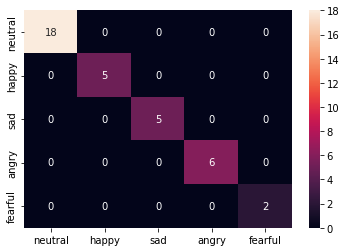

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/My Drive/fusion/savee_fusion_model/LR/expert1'
savedvX = joblib.dump(LR, path)

print("MODEL SAVED")

MODEL SAVED
